# Projet ml-in-the-clouds

## Imports

In [18]:
!pip3 install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import re
from collections import Counter
import random as r

In [115]:
df = pd.read_csv("emotions_train.csv")

## Introduction

`Projet Visant à prédire l'émotion de l'utilisateur lors de la rédaction d'un message sur les réseaux sociaux`

## Data Exploration

In [7]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,joy
freq,2,7029


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


<AxesSubplot: >

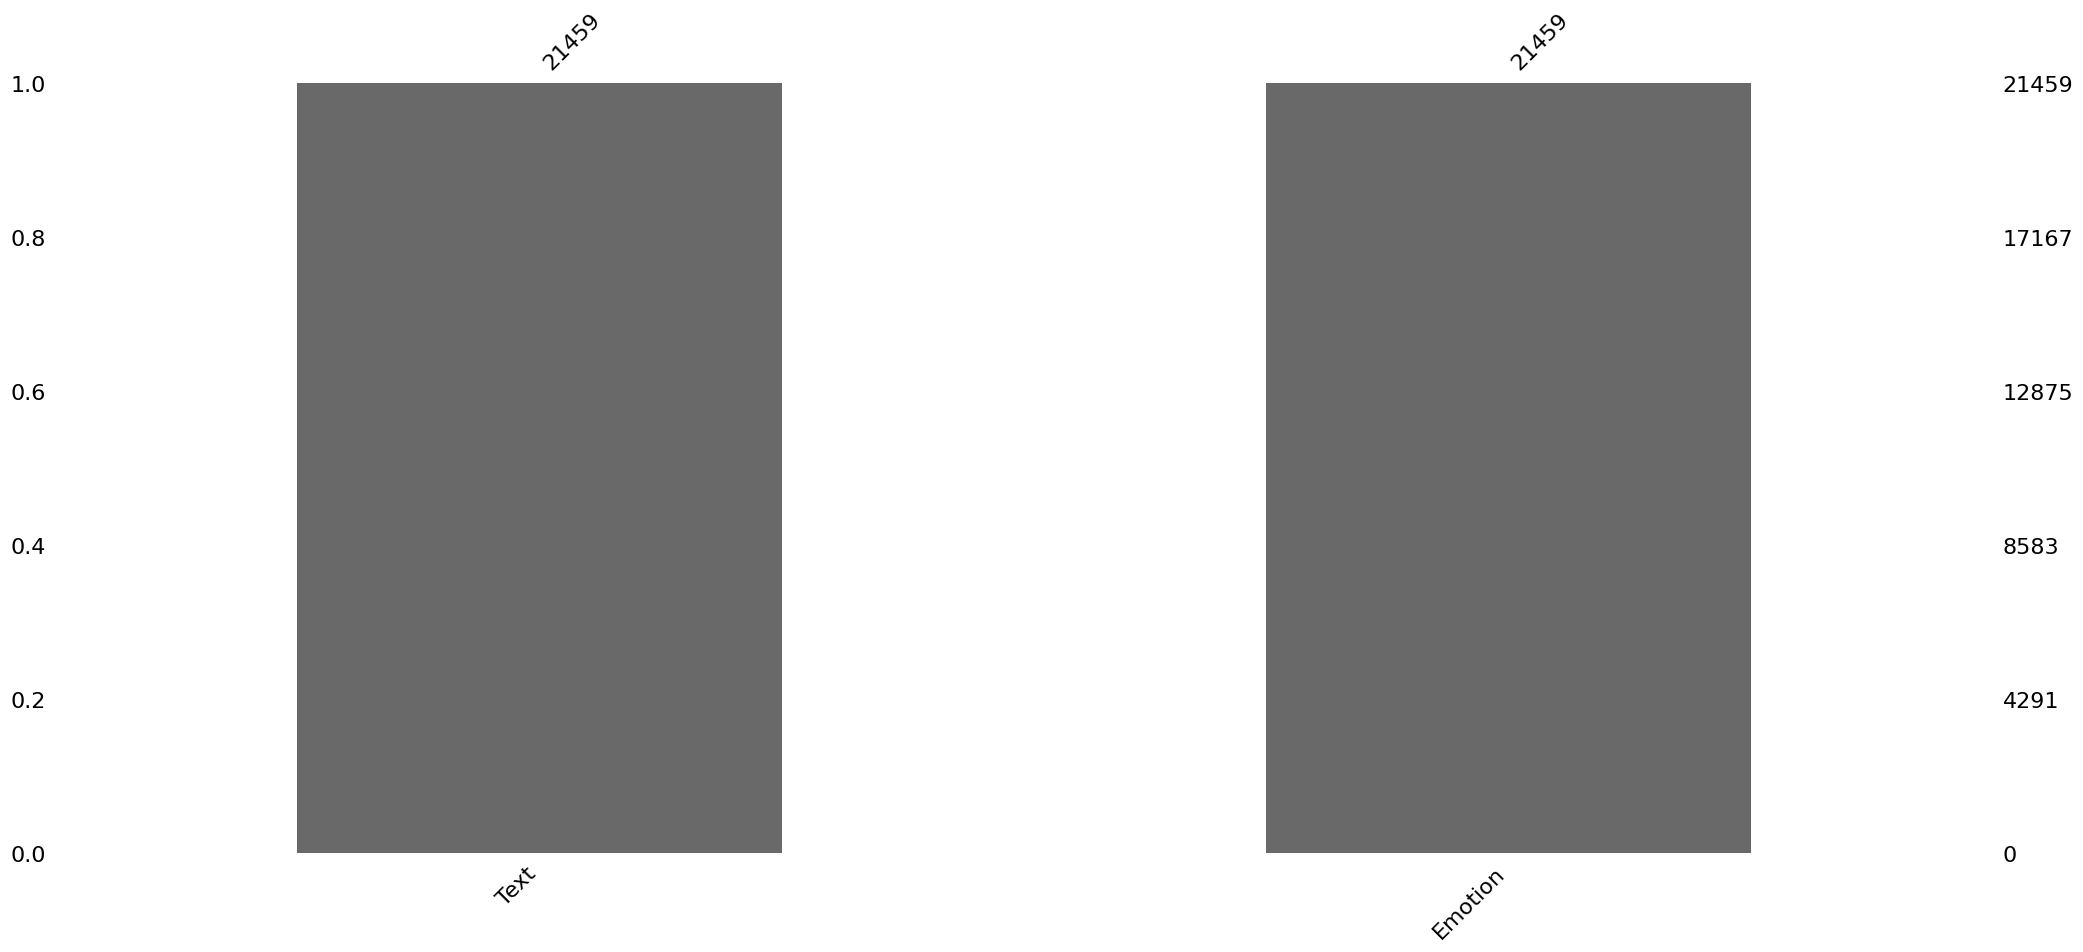

In [20]:
msno.bar(df, sort='ascending')

In [12]:
df.Emotion.value_counts(normalize=True)

joy         0.327555
sadness     0.291952
anger       0.139475
fear        0.123585
love        0.076471
surprise    0.040962
Name: Emotion, dtype: float64

## Data Cleaning

## Words exploration using Count

In [25]:
df.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [107]:
def extract_location_ml(location):
    stopwords = set(['I', 'DIDNT', 'AM','YOU', 'IM', 'THE', 'FROM', 'SO', 'GO', 'BUT', 'WAS', 'AT', 'HER', 'NOT', 'OF',\
        'TO', 'IN', 'THAT', 'WASN', 'ON', 'AND', 'MY', 'GET', 'BEEN', 'FOR', 'ME', 'A', 'IT', 'AN', 'WITH', 'TOO', 'AS', \
            'DO', 'IS', 'M', 'THEN', 'BY'])

    filtered_words = [word.upper() for word in re.findall(r'\b[A-Za-z]+\b', location) if word.upper() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common_word = word_counts.most_common(10)
    if most_common_word:
        return most_common_word[0]
df["Test_Counters"] = df['Text'].apply(extract_location_ml)

# Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
# Test_Counters.head(16)
df["Test_Counters"]
temp_list = list(df["Test_Counters"])
r.shuffle(temp_list)
temp_list

[('ENJOY', 1),
 ('FEEL', 1),
 ('SPENT', 1),
 ('SINKING', 1),
 ('FEELING', 1),
 ('DID', 1),
 ('ONE', 2),
 ('FEEL', 1),
 ('DON', 1),
 ('REALLY', 2),
 ('WOULD', 1),
 ('FEEL', 1),
 ('SOMEONE', 2),
 ('PRAY', 1),
 ('FEEL', 1),
 ('OUT', 2),
 ('THEM', 2),
 ('THINKING', 1),
 ('HIS', 1),
 ('FEELING', 1),
 ('DONT', 1),
 ('ID', 1),
 ('FEEL', 1),
 ('THEM', 2),
 ('DON', 1),
 ('FRIEND', 1),
 ('COME', 1),
 ('WOULD', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('HATE', 1),
 ('BE', 2),
 ('FEEL', 1),
 ('OFTEN', 2),
 ('FEEL', 1),
 ('HAVE', 1),
 ('FUN', 2),
 ('FEEL', 1),
 ('SINGAPORE', 2),
 ('FEEL', 1),
 ('FEEL', 1),
 ('LIKE', 2),
 ('FEELING', 1),
 ('HATE', 1),
 ('FEEL', 1),
 ('FEELING', 1),
 ('FEEL', 1),
 ('HE', 1),
 ('EVELYN', 1),
 ('HAD', 1),
 ('DECIDED', 1),
 ('FEEL', 1),
 ('ALSO', 2),
 ('OR', 3),
 ('DEFINITELY', 1),
 ('LET', 1),
 ('ASKED', 1),
 ('SHE', 1),
 ('STILL', 1),
 ('TRYING', 1),
 ('LOVE', 1),
 ('WHEN', 1),
 ('FEEL', 1),
 ('GLORIA', 1),
 ('REMEMBER', 1),
 ('SKIPPING', 1),
 ('FEELING', 1),
 (

In [99]:
df[df.Text.apply(lambda x: x.lower().find("feel"))!=-1]

,Text,Emotion,Test_Counters
0,i didnt feel humiliated,sadness,"[(FEEL, 1)]"
1,i can go from feeling so hopeless to so damned...,sadness,"[(CAN, 1)]"
2,im grabbing a minute to post i feel greedy wrong,anger,"[(GRABBING, 1)]"
3,i am ever feeling nostalgic about the fireplac...,love,"[(EVER, 1)]"
4,i am feeling grouchy,anger,"[(FEELING, 1)]"
...,...,...,...
21201,"Far from experiencing simple gratitude , such ...",fear,"[(FAR, 1)]"
21202,She was still feeling a little anxious when sh...,fear,"[(SHE, 4)]"
21232,"Feeling thoroughly disquieted , she left her r...",fear,"[(FEELING, 1)]"
21272,"I do n't very often feel frightened , but then...",fear,"[(N, 2)]"


In [89]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [93]:
common_words_by_emotions_df = []
for emotion in df.Emotion.unique():
    df["Test_Counters"] = df['Text'][df.Emotion == emotion].apply(extract_location_ml)
    # Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
    # Test_Counters.head(16)
    print(df["Test_Counters"])


0                             [(FEEL, 1), (HUMILIATED, 1)]
1        [(CAN, 1), (FEELING, 1), (HOPELESS, 1), (DAMNE...
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
21454                                                  NaN
21455                                                  NaN
21456                                                  NaN
21457                                                  NaN
21458                                                  NaN
Name: Test_Counters, Length: 21459, dtype: object
0                                                      NaN
1                                                      NaN
2        [(GRABBING, 1), (MINUTE, 1), (POST, 1), (FEEL,...
3                                                      NaN
4                             [(FEELING, 1), (GROUCHY, 1)]
      

## Discovering Pycaret

In [117]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'Emotion', session_id = 123)

ImportError: cannot import name '_format_load_msg' from 'joblib.memory' (/home/julienrm/.pyenv/versions/3.8.12/envs/ml-in-the-cloud/lib/python3.8/site-packages/joblib/memory.py)